In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import os

nav = webdriver.Chrome()

In [8]:
nav.get("https://www.tecmundo.com.br/novidades?page=1")

In [4]:
homePageURL = "https://www.tecmundo.com.br/"
defaultNewsURL = "https://www.tecmundo.com.br/novidades?page="

def nextPage():
    current_url = nav.current_url
    page_number = int(current_url.split(defaultNewsURL)[1])
        
    nav.get(f"{defaultNewsURL}{page_number+1}")

def closeAd():
    close_ad_bt = nav.find_elements(By.CLASS_NAME, "tec--ad__close")[1]
    close_ad_bt.click()

In [9]:
data = []
headers = ["Subject", "Date"]

while(True):
    try:
        closeAd()
    except:
        newsList = nav.find_elements(By.CLASS_NAME, "tec--list__item")
        if (len(newsList)) == 0:
            break
        for news in newsList:
            link = news.find_element(By.CLASS_NAME, "tec--card__thumb__link").get_attribute("href") #https://www.tecmundo.com.br/minha-serie/272942-versoes-crime-entenda-final-filme-keanu-reeves.htm
            subject = link.split(homePageURL)[1].split("/")[0]
            date = news.find_element(By.CLASS_NAME, "tec--timestamp__item").text #20/10/2023
            date = "/".join(date.split("/")[1:3]) # ["10", "2023"] -> 10/2023
            data.append((subject, date))

        nextPage()

df = pd.DataFrame(data, columns=headers)
print('Finished')

Finished


In [18]:
df_aux = pd.DataFrame(data, columns=headers)
df_aux.to_csv('Checkpoint5.csv')

In [127]:
from pathlib import Path 

caminho = Path(Path.cwd())
arquivos = caminho.iterdir()

data = []
headers = ["Subject", "Date"]
main_df = pd.DataFrame(data, columns = headers)

for arquivo in arquivos:
    if "Checkpoint" in str(arquivo):
        aux_df = pd.read_csv(arquivo)
        aux_df = aux_df.drop('Unnamed: 0', axis=1)
        main_df = pd.concat([main_df, aux_df])
display(main_df)
main_df.dtypes


,Subject,Date
0,voxel,10/2023
1,redes-sociais,10/2023
2,minha-serie,10/2023
3,voxel,10/2023
4,ciencia,10/2023
...,...,...
10354,voxel,8/2017
10355,voxel,8/2017
10356,mercado,8/2017
10357,dispositivos-moveis,8/2017


Subject    object
Date       object
dtype: object

In [128]:
main_df['Date'] = pd.to_datetime(main_df['Date'], format='%m/%Y')
main_df.dtypes

Subject            object
Date       datetime64[ns]
dtype: object

In [129]:
main_df['Month'] = main_df['Date'].dt.month
main_df['Year'] = main_df['Date'].dt.year

In [37]:
main_df.to_csv('FinalDF.csv')

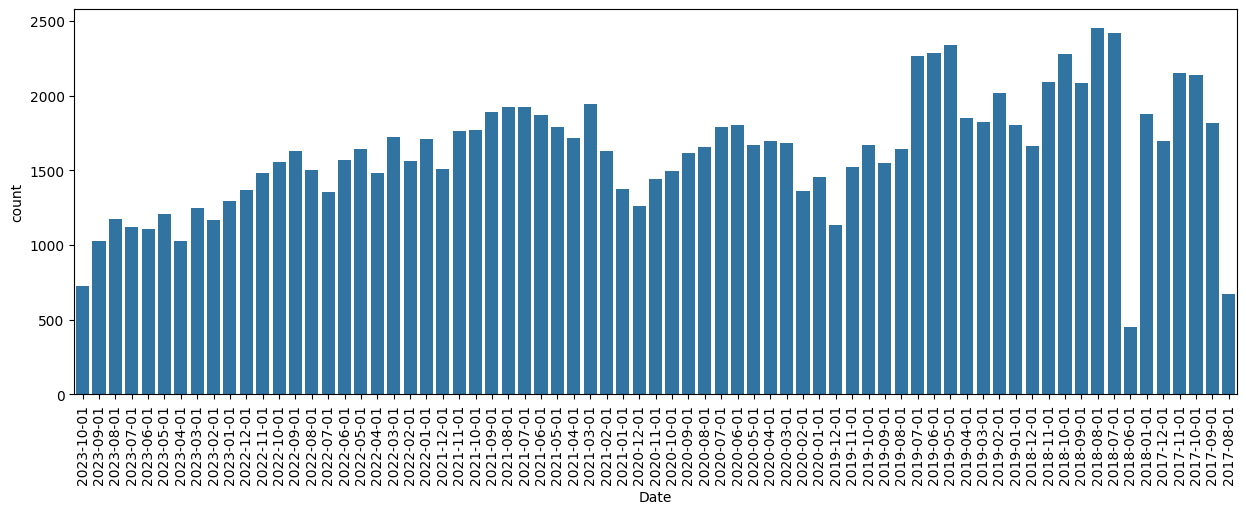

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
graph = sns.countplot(x=main_df["Date"])
graph.tick_params(axis='x', rotation=90)

[2017, 2018, 2019, 2020, 2021, 2022, 2023]
[2019, 2020, 2021, 2022, 2023]


C:\Users\bejr2\AppData\Local\Temp\ipykernel_31404\1526547512.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x=year_df["Month"], palette=colors)
C:\Users\bejr2\AppData\Local\Temp\ipykernel_31404\1526547512.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x=year_df["Month"], palette=colors)
C:\Users\bejr2\AppData\Local\Temp\ipykernel_31404\1526547512.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x=year_df["Month"], palette=colors)
C:\Users\bejr2\AppData\Local\Temp\ipykernel_31404\1526547512.py:28:

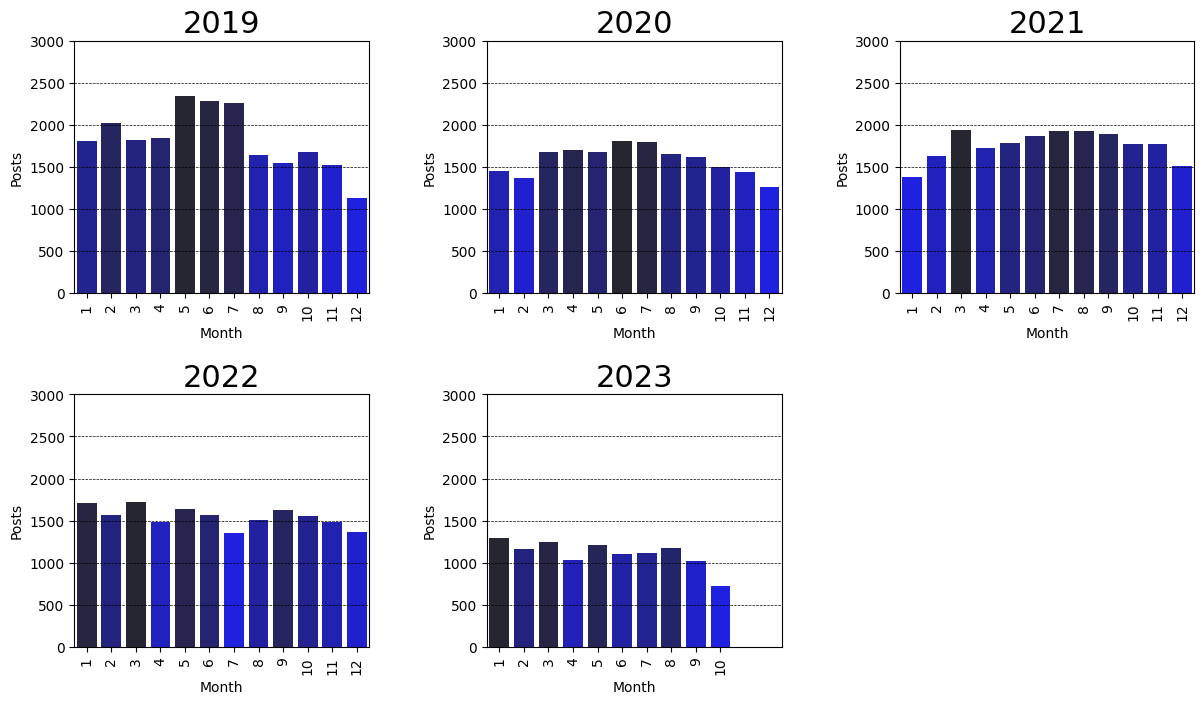

In [157]:
years = list(set(main_df["Year"].values))

years.sort()
print(years)
years.remove(2017)
years.remove(2018)
plt.figure(1, figsize = (14,12))
x = 3 
y = 3
print(years)


for i, year in enumerate(years):
    year_df = main_df[main_df["Year"] == year]
    month_counter = year_df["Month"].value_counts()

    index_list = list(month_counter.index)
    values = list(month_counter)
    aux_dict = dict(zip(index_list, values))

    custom_palette = sns.dark_palette("blue", len(aux_dict))
    
    colors = [(0.0, 0.0, 0.0)]*len(aux_dict)
    for j,month in enumerate(aux_dict):
        colors[month-1] = custom_palette[j]
    
    plt.subplot(x, y, i+1)
    graph = sns.countplot(x=year_df["Month"], palette=colors)
    
    graph.tick_params(axis='x', rotation=90)
    plt.ylabel("Posts")
    plt.title(year, fontsize=22)
    plt.axis([-0.5, 11.5, 0, 3000])  # Ajustar os limites x e y
    plt.grid(axis='y',color = 'black', linestyle = '--', linewidth = 0.5)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [134]:
subjects = main_df['Subject'].value_counts()
print(subjects)

for item in subjects.index:
    if subjects[item] < 200:
        main_df['Subject'] = main_df['Subject'].replace(f'{item}', 'Others')

main_df['Subject'] = main_df['Subject'].replace('voxel', 'jogos')
main_df['Subject'] = main_df['Subject'].replace('mobilidade-urbana-smart-cities', 'mobilidade-urbana')
subjects = main_df['Subject'].value_counts()
print(subjects)

Subject
jogos                             29617
minha-serie                       23030
mercado                           10831
produto                           10006
software                           7706
ciencia                            6945
dispositivos-moveis                6943
cultura-geek                       5830
internet                           5395
seguranca                          3947
redes-sociais                      2783
mobilidade-urbana-smart-cities     2032
Others                              390
Name: count, dtype: int64
Subject
jogos                  29617
minha-serie            23030
mercado                10831
produto                10006
software                7706
ciencia                 6945
dispositivos-moveis     6943
cultura-geek            5830
internet                5395
seguranca               3947
redes-sociais           2783
mobilidade-urbana       2032
Others                   390
Name: count, dtype: int64


[2017, 2018, 2019, 2020, 2021, 2022, 2023]
[2019, 2020, 2021, 2022, 2023]


C:\Users\bejr2\AppData\Local\Temp\ipykernel_31404\2677158210.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=counter.index, y=counter.values,palette=custom_palette)
C:\Users\bejr2\AppData\Local\Temp\ipykernel_31404\2677158210.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=counter.index, y=counter.values,palette=custom_palette)
C:\Users\bejr2\AppData\Local\Temp\ipykernel_31404\2677158210.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x=counter.index, y=counter.values,palette=custom_palette)
C:\User

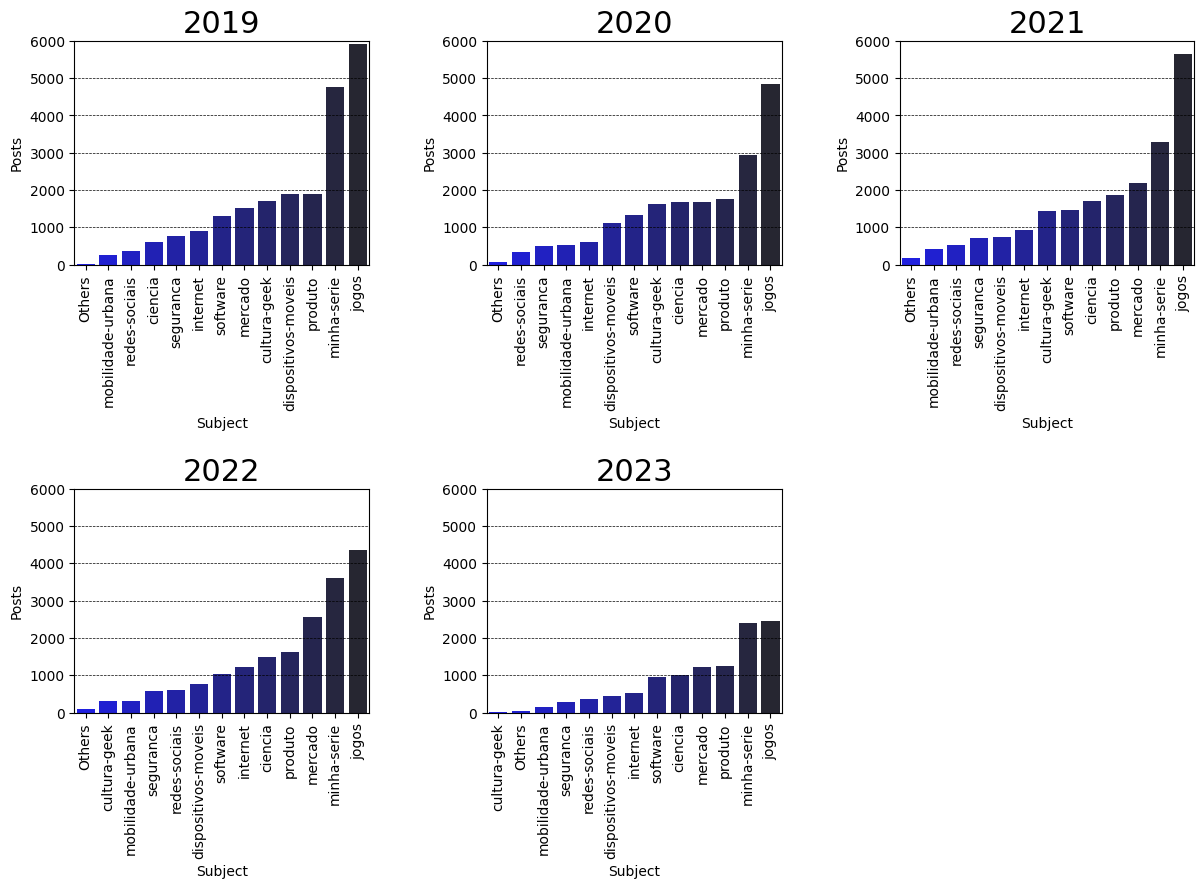

In [158]:
years = list(set(main_df["Year"].values))

years.sort()
print(years)
years.remove(2017)
years.remove(2018)
plt.figure(1, figsize = (14,14))
x = 3 
y = 3
print(years)

for i, year in enumerate(years):
    year_df = main_df[main_df["Year"] == year]
    subject_counter = year_df["Subject"].value_counts(ascending=True)

    


    custom_palette = sns.dark_palette("blue", len(subject_counter))
    custom_palette.reverse()

    plt.subplot(x, y, i+1)
    counter = year_df['Subject'].value_counts(ascending=True)
    graph = sns.barplot(x=counter.index, y=counter.values,palette=custom_palette)
    
    graph.tick_params(axis='x', rotation=90)
    plt.ylabel("Posts")
    plt.title(year, fontsize=22)
    plt.axis([-0.5, 12.5, 0, 6000])  # Ajustar os limites x e y
    plt.grid(axis='y',color = 'black', linestyle = '--', linewidth = 0.5)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1.0)
plt.show()